#Iterable


Iterable refers to objects that can be traversed by iteration, such as lists, strings, tuples, dictionaries, collections, and so on.


In [1]:
mylist = [1, 2, 3]
for i in mylist:
    print(i)

1
2
3


When it encounters an iterative operation, such as for ... in x
it will call iter(x) function
Checks if the object implements the _iter__ method, and if so, calls it to obtain an iterator;

If the __iter__ method is not implemented, but the __getitem__ method is implemented, Python will create an iterator and try to get the elements in order (starting at index 0);

If neither method is implemented, a TypeError exception will be thrown indicating that the object cannot be iterated.

Objects that have an __iter__ method or a __getitem__ method are therefore often called iterables.

In the notes it says "In our custom sequence example of lecture 8 (French deck), we defined __getitem__ and __len__ which caused our object to become iterable." 

# Check if an object is iterable

In [3]:
# Using dict 
mylist = [1, 2, 3]
mylist_dir = dir(mylist)
print(mylist_dir) 
print('__iter__' in dir(mylist) or '__getitem__' in dir(mylist))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
True


In [4]:
# Using isinstance
from collections import Iterable
mylist = [1, 2, 3]
print(isinstance(mylist, Iterable)) 

True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


# Iterator

In short, an iterable object with a [next()](https://docs.python.org/3/library/functions.html#next) method is an iterator,

In [6]:
# The next() built-in returns the next element of the iterable.
# When the iterator is exhausted a StopIteration exception is raised.
mylist = [1,2,3]
it = iter(mylist) 
while True:
    try:
        print(next(it))
    except StopIteration:
        print("Stop iteration!")
        break

1
2
3
Stop iteration!


# Generator

Python provides a generator to create iterator functions. A generator is a special type of function that does not return a single value, but an iterator object containing a sequence of values. In a generator function, use a yield statement instead of a return statement.

The idea of ​​the generator is that we don't need to create this list all at once, we just need to remember its creation rules, and then calculate and create it again and again when we need to use it.



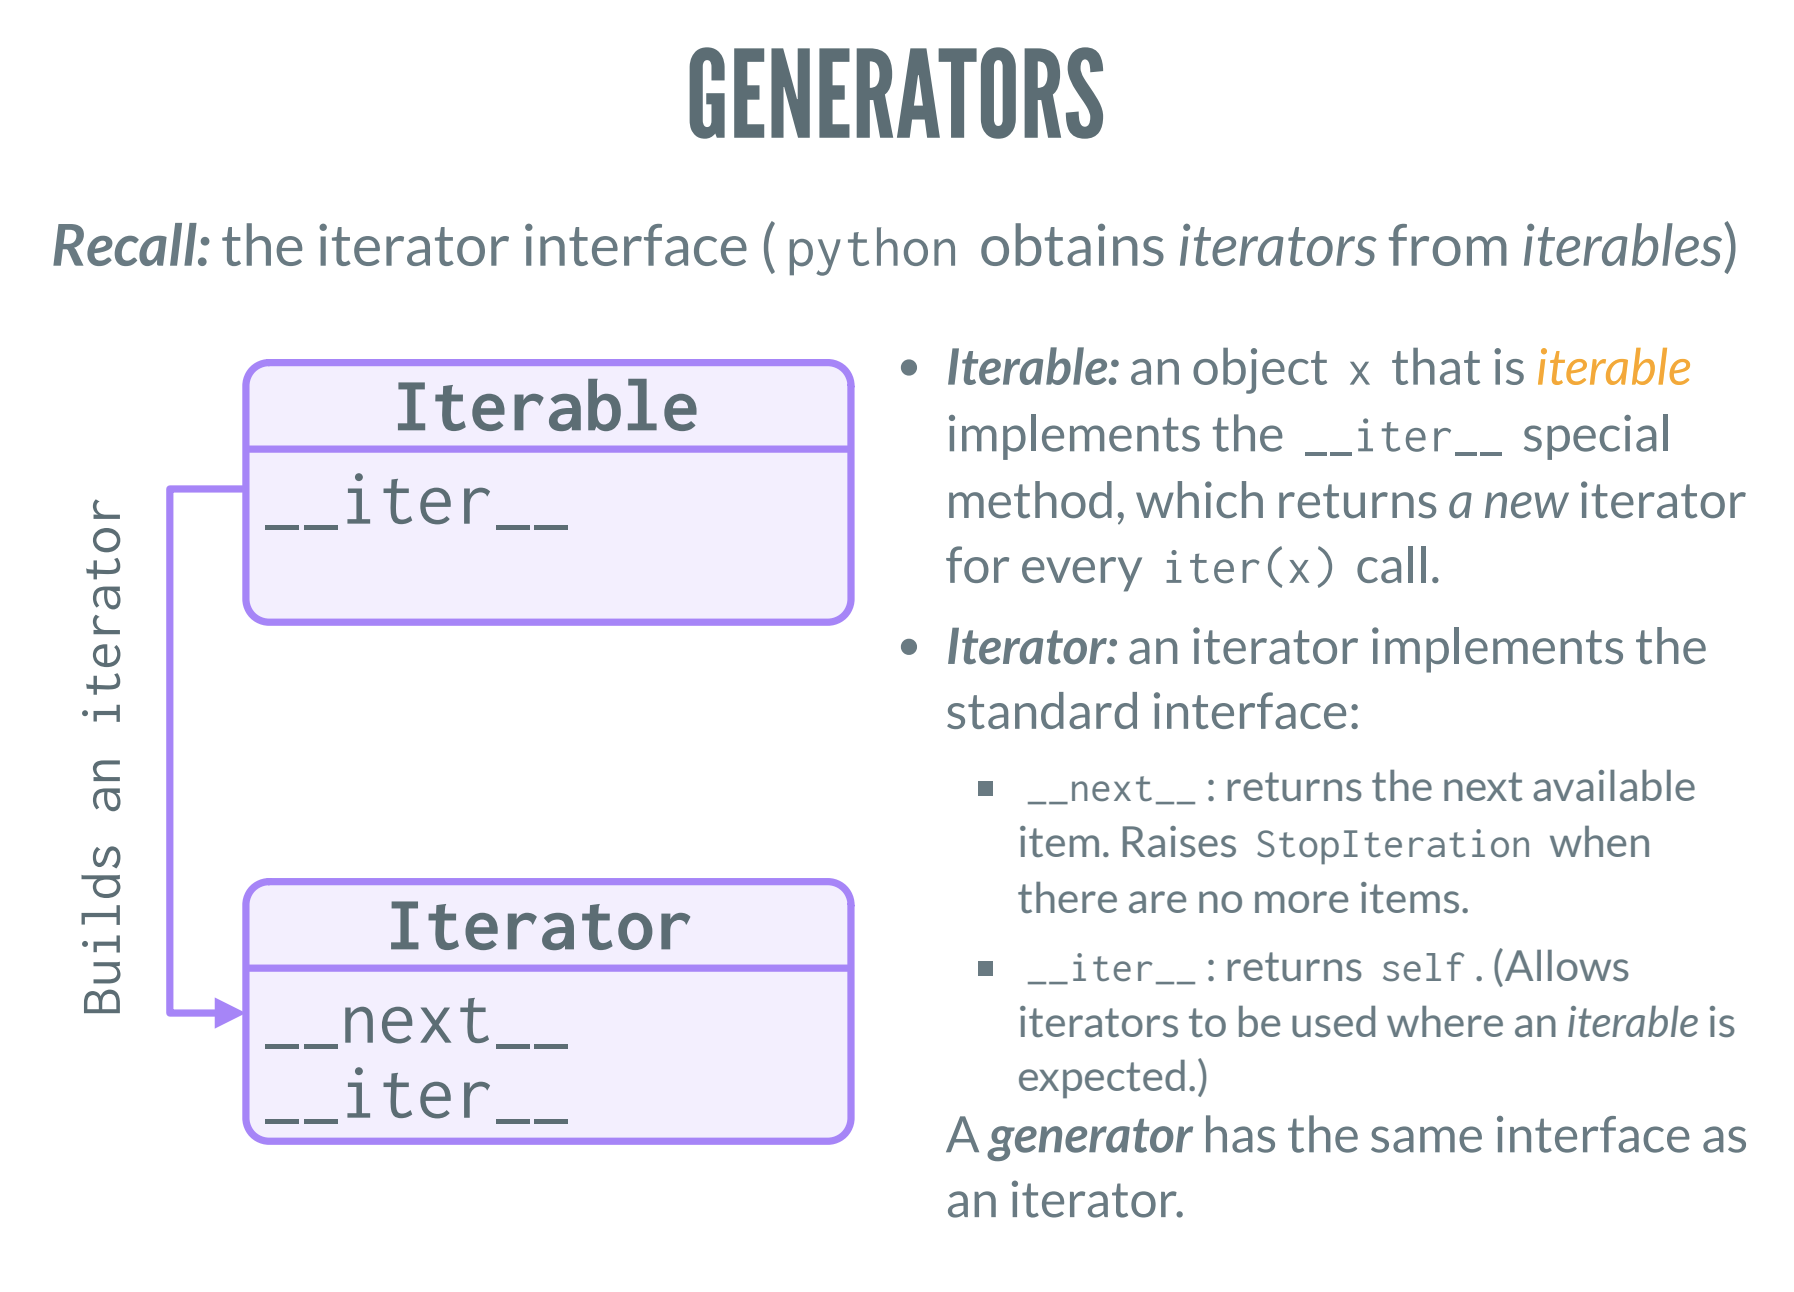

In [7]:
my_generator = (x**3 for x in range(10))
for i in my_generator:
    print(i)

0
1
8
27
64
125
216
343
512
729


# Yield

Any python function that has the yield keyword in its body is a
generator function. A generator function is a function which, when
called, returns a generator object. 

In short, you can view yield as return, but what it returns is a generator.

In [8]:
def CS107():
    print("First")
    yield 1
    print("Second")
    yield 0
    print("Third")
    yield 7
my_generator = CS107() 
print(type(my_generator)) # <class 'generator'>

<class 'generator'>


In [9]:
for item in CS107():
    print(item)

First
1
Second
0
Third
7


In [12]:
def simple_gen(a):
    print('-> Started: a =', a)
    b = yield a
    print('-> Received: b =', b)
    c = yield a + b
    print('-> Received: c =', c)

gen = simple_gen(12)
try:
  next(gen) # -> Started: a = 12
  next(gen) # ？
  next(gen) # ？
except:
  print("pass")

-> Started: a = 12
-> Received: b = None
pass


From the first next(gen) call, it stops at yield a , then when you call next(gen) again, b is actually a None value, which causes the exception.

Why is b a None value? Since we didn't receive any value at yield a , b is the None value. 

In [21]:
def simple_gen(a):
    print('-> Started: a =', a)
    b = yield a
    print('-> Received: b =', b)
    c = yield a + b
    print('-> Received: c =', c)
gen = simple_gen(12)
next(gen) # -> Started: a = 12
gen.send(15)

try:
  gen.send(22)
except:
  print("Stop iteration")

-> Started: a = 12
-> Received: b = 15
-> Received: c = 22
Stop iteration


In [23]:
# Write a generator which computes the running average.
def running_average():
    total = 0.0
    counter = 0
    average = None
    while True:
        term = yield average
        total += term
        counter += 1
        average = total / counter


ra = running_average()  # initialize the coroutine
next(ra)                # we have to start the coroutine
for value in [1, 2, 3, 5, 12]:
    out_str = "sent: {val:3d}, new average: {avg:6.2f}"
    print(out_str.format(val=value, avg=ra.send(value)))


sent:   1, new average:   1.00
sent:   2, new average:   1.50
sent:   3, new average:   2.00
sent:   5, new average:   2.75
sent:  12, new average:   4.60


In [26]:
#Write a floating number range
def frange(*args):
    """  dfgdg """
    startval = 0
    stepsize = 1    
    if len(args) == 1:
        endval = args[0]
    elif len(args) == 2:
        startval, endval = args 
    elif len(args) == 3:
        startval, endval, stepsize = args
    else:
        txt = "range expected at most 3 arguments, got " + len(args)
        raise TypeError(txt)
    
    value = startval
    factor = -1 if stepsize < 0 else 1
    while (value - endval) * (factor) < 0:
        yield value
        value += stepsize

for i in frange(5.6):
    print(i, end=", ")
print()
for i in frange(0.3, 5.6):
    print(i, end=", ")
print()
for i in frange(0.2, 2.2, 0.5):
    print(i, end=", ")
print()

0, 1, 2, 3, 4, 5, 
0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 
0.2, 0.7, 1.2, 1.7, 


# Further reading and reference

[Iterators and Iterables](https://python-course.eu/advanced-python/iterable-iterator.php)

[Generators and Iterators](https://python-course.eu/advanced-python/generators-and-iterators.php)

[Using Advanced Generator Methods](https://realpython.com/introduction-to-python-generators/#using-advanced-generator-methods)